# TimeGPT - A Foundational Model for Time Series Forecasting : A Review

## Introduction

The buzz surrounding the Generative Pre-Trained Transformers (GPTs) has been ever growing since their introduction into the world of AI. GPTs are versatile. They can work with text, images, videos, presentations, and much more. However, Time Series Forecasting has been a zone where GPT's didn't make much breakthrough - Until Now!

In this article, we introduce you to one of the most recent developments in Time Series Forecasting domain - TimeGPT .

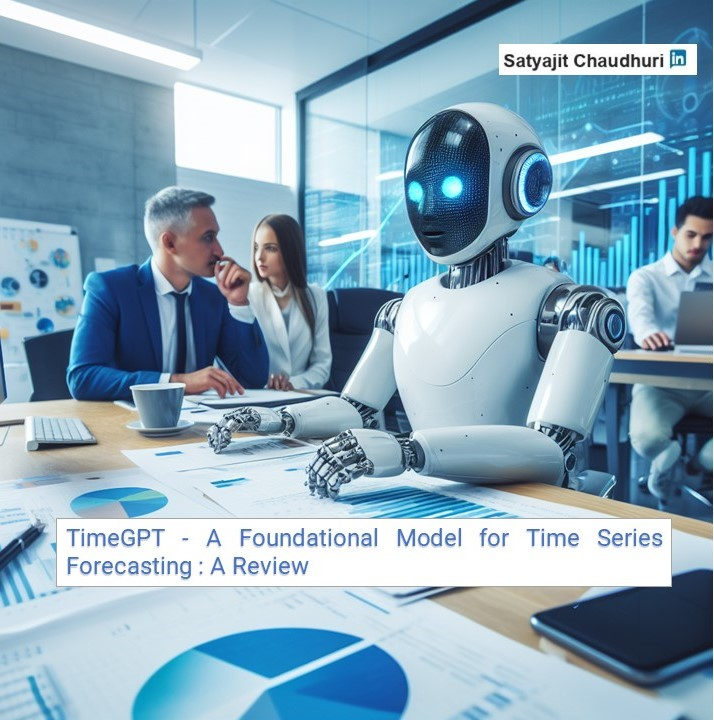

As the name suggests, it is a Generative Pretrained Model for Time Series Analysis. This article describes TimeGPT, the first foundation model for time series, capable of generating accurate predictions for diverse datasets not seen during training. This article will firstly walk you through the architecture of the model, the training dataset and why this is different! Then we will take up a Weekly Sales Data from Walmart and then Use various Statistical and Machine Learning based models to generate forecast and compare that with that of TimeGPT forecasts.

## Contents:

1. The need for a Generative Solution
2. The advent of TimeGPT
3. The Architecture of the Model
4. The Versatile Data Used to Train the Transformer
5. Experiment
6. Conclusion

## 1. The need for a Generative Solution

Time series data is an essential component in various sectors, including finance, healthcare, meteorology, and social sciences. It provides valuable insights into temporal patterns, trends, and cyclical variations, becoming the backbone of systems, enterprises, and institutions. Whether it's tracking ocean tides or monitoring the daily closing value of the Dow Jones, time series data plays an indispensable role in forecasting future values and informing decision-making processes.


Traditionally, analysts have relied on methods like ARIMA, ETS, MSTL, Theta, and CES, as well as machine learning models like XGBoost and LightGBM, to analyze time series data. These tools have proven to be reliable over the years. However, deep learning models, which have seen remarkable success in natural language processing (NLP) and computer vision (CV), face skepticism in the time series analysis field. While models like LSTM, GRU, and FBProphet show promise, challenges such as misaligned evaluation settings and the struggle of deep learning architectures to generalize with limited and specific datasets hinder their adoption.

One glaring obstacle halting progress in time series analysis is the absence of standardized large-scale datasets designed specifically for deep learning methods. Unlike computer vision, which benefits from benchmark datasets, the time series community lacks these resources, stifling innovation and hindering the validation of new techniques. To unleash the full potential of deep learning models in time series analysis, it is crucial to overcome these challenges and develop the necessary resources that will allow researchers and analysts to explore new horizons. The time has come to bridge the gap and pave the way for groundbreaking advancements in the realm of time series analysis.

## 2. The advent of TimeGPT

Azul Garza and Max Mergenthaler-Canseco from Nixtla in San Francisco, CA, USA, outline the architecture, training, and evaluation of TimeGPT-1  in their paper. They showcase its remarkable performance across diverse time series datasets. What sets TimeGPT apart is its user-friendly, low-code approach to time series forecasting. Users can simply upload their time series data and generate forecasts for desired time steps with just a single line of code. The TimeGPT model “reads” time series data much like the way humans read a sentence – from left to right. It looks at windows of past data, which we can think of as “tokens”, and predicts what comes next. This prediction is based on patterns the model identifies in past data and extrapolates into the future. The API provides an interface to TimeGPT, allowing users to leverage its forecasting capabilities to predict future events. TimeGPT can also be used for other time series-related tasks, such as what-if scenarios, anomaly detection, and more.

In comparison to established statistical, machine learning, and deep learning methods, TimeGPT stands out in terms of performance, efficiency, and simplicity through its zero-shot inference capability. 

## 3. The Architecture of the Model

Self-attention, the revolutionary concept introduced by the paper "Attention is all you need", is the basis of the this foundational model. The TimeGPT model is not based on any existing large language model(LLMs). It is independently trained on vast timeseries dataset as a large transformer model and is designed so as to minimize the forecasting error.

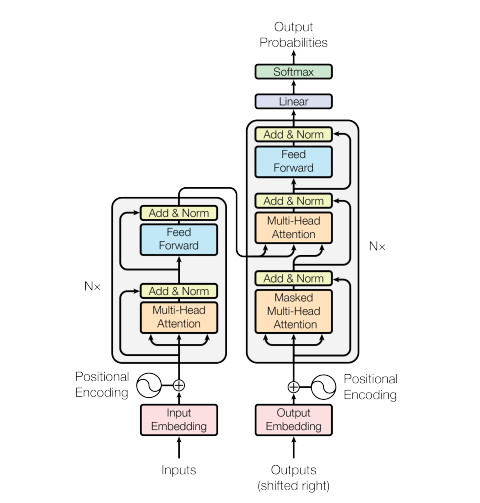

This model uses the past data window to forecast the future. This model enhances the input with local positional encoding. The model employs an encoder-decoder architecture with multiple layers, incorporating residual connections and layer normalization. The decoder's output is mapped to the forecasting window dimension through a linear layer. The underlying idea is that attention-based mechanisms effectively capture the diversity of past events, enabling accurate extrapolation of potential future distributions.

## 4. The Versatile Data Used to Train the Transformer

The training dataset has been carefully curated in order to develop a robust foundational model. The model is trained on the biggest collection of publicly available time series datasets.

The model handles the Major pitfalls of TS Forecasting cases in its own unique way:

- Time Series Characteristic Variations: Finance, economics, demographics, healthcare, weather, IoT sensor data, energy, web traffic, sales, transport, and banking are the domains from which the datasets have been selected. The presence of such vast domains have ensured that the model encounters a wide range of time series characteristics.
- Temporal Patterns: The training datasets consists of series with multiple seasonality, cyclical patterns in data, and various types of trends. These effectively familiarizes the model with the temporal patterns across domains.
- Noise and Anomalous Patterns: Some datasets contain clean regular patterns while other contain significant noise and unexpected events providing a broad spectrum of scenarios for the model to learn from.


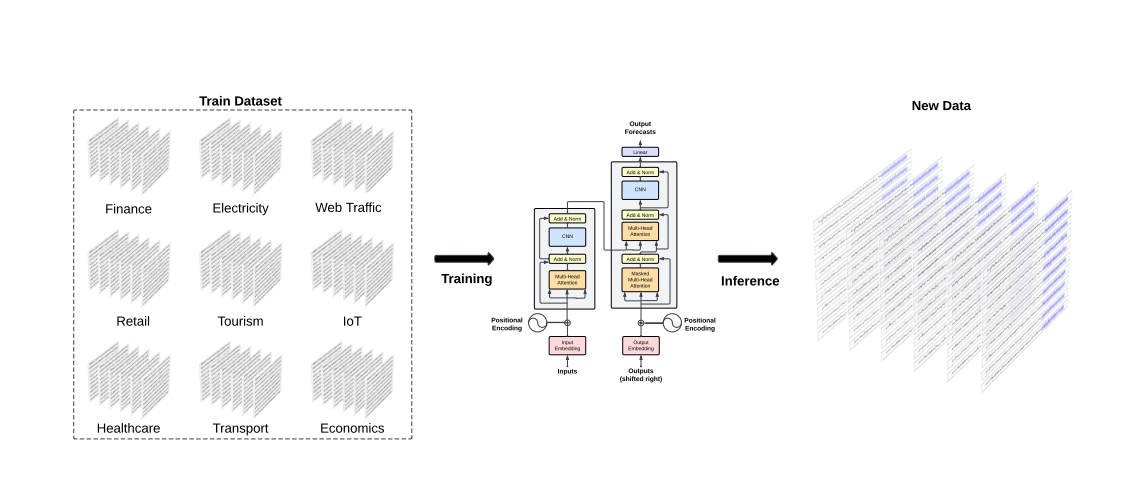

Training TimeGPT on this comprehensive dataset enhances its adaptability and capacity to handle diverse scenarios, thereby improving its resilience and ability to make accurate predictions on previously unseen time series. Consequently, TimeGPT demonstrates robust forecasting capabilities without necessitating individualized model training or optimization efforts.

TimeGPT underwent a multi-day training period on a cluster of NVIDIA A10G GPUs. The extensive hyperparameter tuning experiments showed that larger batch sizes and  smaller learning rate proved beneficial. Implemented in PyTorch, TimeGPT was trained using the Adam with a learning rate decay strategy that reduced the rate to 12% of its initial value.

Now Let's move on to see a Practical application of these GPT. Here we will train and forecast the same data with multiple models like:

Statistical Algorithm - AutoARIMAMachine Learning Algorithm - Linear Regression, LGBM Regression, XGB Regression and Random Forest Regression.Transformer Based - TimeGPT.

In all of theses cases we will use the Statsforecast, MLforecast and Nixtlats modules all of which are developed by Nixtla company.

## 5. Experiment:

## Importing Necessary Libraries:

In [68]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
from numba import njit
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from nixtlats import TimeGPT


## Data Reading and Processing:

The data used in this study can be found here. [https://www.kaggle.com/datasets/souravprakashai/walmart-condensed-sales-data?select=walmart.csv]

In [2]:
file_path = "walmart.csv"
df = pd.read_csv(file_path)

# Convert "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Set "Date" column as index
df.set_index('Date', inplace=True)

# Resample data into Weekly frequency. Although this is not required. Keepig it so that one can change into 'MS' if needed.
df_resampled = df.resample('W').sum()

df_resampled.reset_index(inplace=True)

df_resampled = df_resampled[["Date","Weekly_Sales"]]

print(df_resampled.head())

In [78]:
df_resampled.head()

,Date,Weekly_Sales
0,2010-02-07,49750740.50000
1,2010-02-14,48336677.63000
2,2010-02-21,48276993.78000
3,2010-02-28,43968571.13000
4,2010-03-07,46871470.30000


## Data Visualization

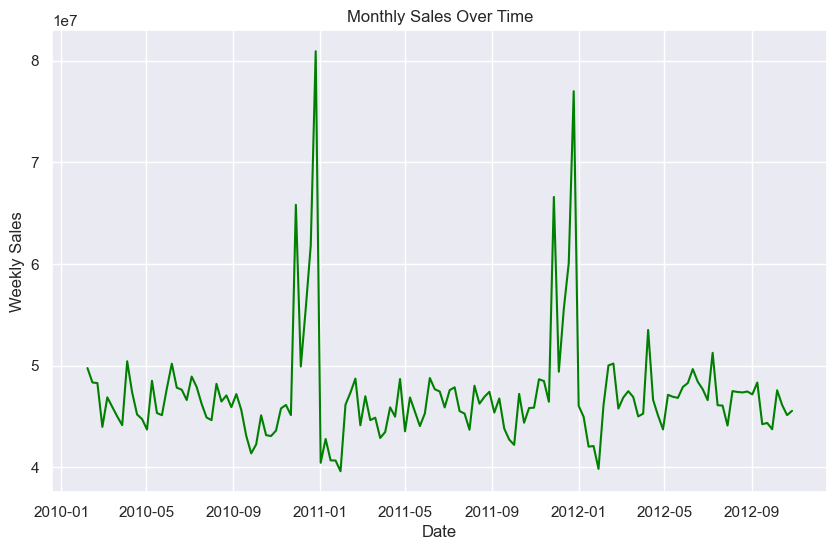

In [85]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x="Date", y='Weekly_Sales', data=df_resampled, color='green')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

## STL Decomposition of the Data

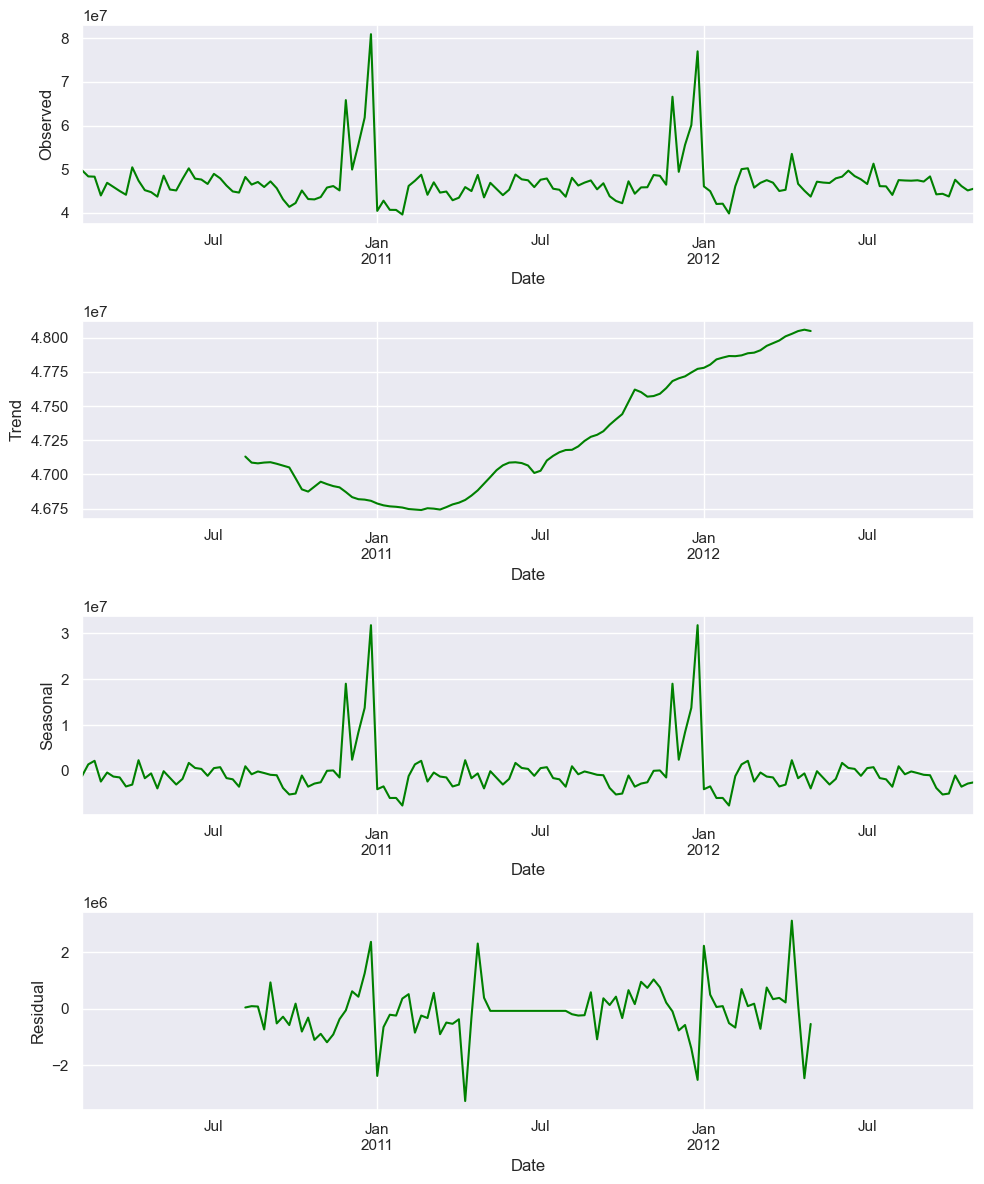

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df_resampled.set_index('Date', inplace=True)
result = seasonal_decompose(df_resampled['Weekly_Sales'], model='additive')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 12))

result.observed.plot(ax=ax1, color='green')
ax1.set_ylabel('Observed')

result.trend.plot(ax=ax2, color='green')
ax2.set_ylabel('Trend')

result.seasonal.plot(ax=ax3, color='green')
ax3.set_ylabel('Seasonal')

result.resid.plot(ax=ax4, color='green')
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()

df_resampled.reset_index(inplace=True)


#### Now Let's proceed to model building.

## Train & Test Split

In [3]:
train_size = int(len(df_resampled) * 0.8)
train, test = df_resampled.iloc[:train_size], df_resampled.iloc[train_size:]

print(f'Train set size: {len(train)}')
print(f'Test set size: {len(test)}')


Train set size: 114
Test set size: 29


## Forecasting with StatsForecast - AutoARIMA

In [89]:
train_ = pd.DataFrame({'unique_id':[1]*len(train),'ds': train["Date"], "y":train["Weekly_Sales"]})
test_ = pd.DataFrame({'unique_id':[1]*len(test),'ds': test["Date"], "y":test["Weekly_Sales"]})

sf = StatsForecast(models = [AutoARIMA(season_length = 52)],freq = 'W')

sf.fit(train_)
sf_prediction = sf.predict(h=len(test))
sf_prediction.rename(columns={'ds': 'Date'}, inplace=True)
sf_prediction.head()

C:\Users\Satyajit\AppData\Roaming\Python\Python39\site-packages\statsforecast\core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,Date,AutoARIMA
unique_id,,
1,2012-04-15,48190620.00000
1,2012-04-22,51893984.00000
1,2012-04-29,46747324.00000
1,2012-05-06,50079252.00000
1,2012-05-13,48663436.00000


## Forecasting with MLForecast - Linear Regression, LGBM Regression, XGB Regression and Random Forest Regression

In [7]:
models = [LinearRegression(),
    lgb.LGBMRegressor(verbosity=-1),
    xgb.XGBRegressor(),
    RandomForestRegressor(random_state=0),
]
@njit
def rolling_mean_7(x):
    return rolling_mean(x, window_size=7)
@njit
def rolling_mean_14(x):
    return rolling_mean(x, window_size=14)




fcst = MLForecast(
    models=models,
    freq='W',
    lags=[7,14,28],
    lag_transforms={
        1: [expanding_mean],
        7: [rolling_mean_7, rolling_mean_14],
        14: [rolling_mean_7, rolling_mean_14]
    },
    date_features=['year', 'month', 'day', 'dayofweek', 'quarter', 'week'],
    target_transforms=[Differences([7])])
fcst.fit(train_)
ml_prediction = fcst.predict(len(test_))
ml_prediction.rename(columns={'ds': 'Date'}, inplace=True)

In [80]:
ml_prediction.head()

,unique_id,ds,LinearRegression,LGBMRegressor,XGBRegressor,RandomForestRegressor
0,1,2012-04-15,41842214.80173,47588825.02898,48272442.82000,45833764.83470
1,1,2012-04-22,50638646.10393,51285775.02042,46844922.78152,46303670.96710
2,1,2012-04-29,43725162.91287,49668743.07655,48599130.48500,46757381.34520
3,1,2012-05-06,46293983.73351,44586443.04813,45108290.31500,45904553.78830
4,1,2012-05-13,48462850.62896,45476224.31332,46374773.57500,46292852.81230


## TimeGPT Model

In [10]:
#Installing the Library
!pip install nixtlats

#Importing TimeGPT
from nixtlats import TimeGPT

To use the TimeGPT, you need to have the API Token from Nixtla. [https://www.nixtla.io/#tgpt] 

For privacy concerns I will not be replacing the token with "Your Token". 

In [11]:
os.environ['TIMEGPT_TOKEN'] ='Your_Token'

In [12]:
timegpt = TimeGPT(token=os.environ['TIMEGPT_TOKEN'])

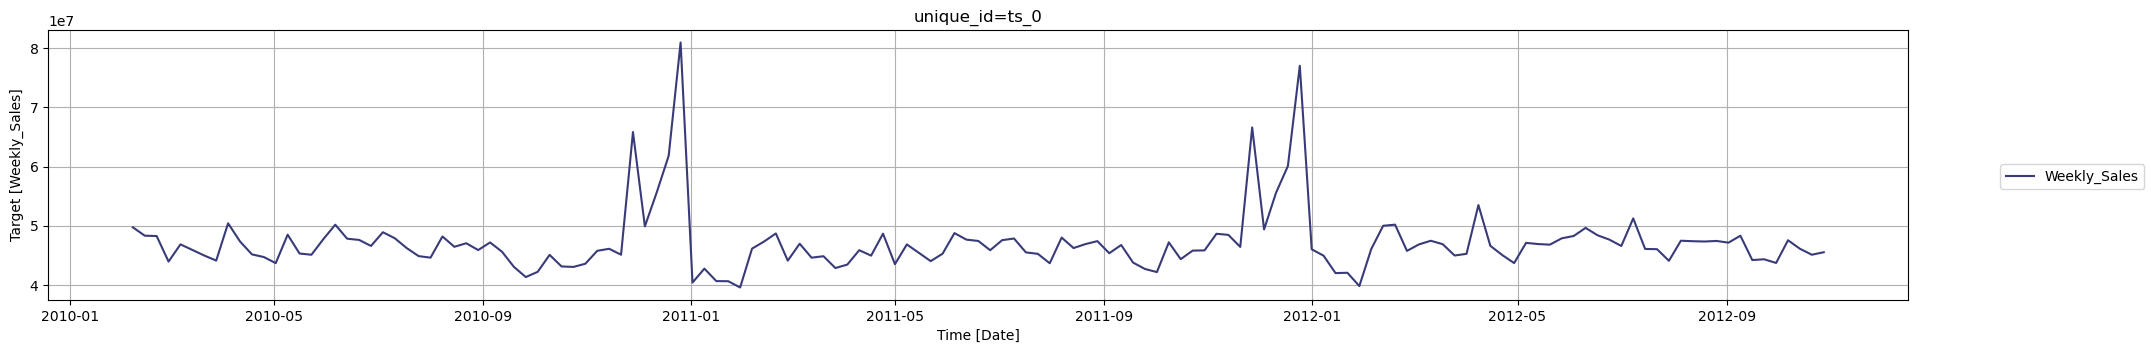

<Figure size 6000x4000 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(60,40))
timegpt.plot(df_resampled, time_col='Date', target_col='Weekly_Sales')

Now we will use it TimeGPT to generate forecasts. And this part is really interesting. As you might have seen, the libraries used in this text are quite advanced then traditional pmdarima etc. Still there was significant amount of lines needed to fit and predict on the data. Now let's see how TimeGPT does it.

In [17]:
timegpt_fcst_df = timegpt.forecast(df=train, h=len(test), time_col='Date', target_col='Weekly_Sales', freq='W')

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Inferred freq: W-SUN
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


In [83]:
timegpt_fcst_df.head()

,Date,TimeGPT
0,2012-04-15,50153732
1,2012-04-22,49353316
2,2012-04-29,48975556
3,2012-05-06,48870404
4,2012-05-13,48906788


In [44]:
timegpt_fcst_df["Date"]=pd.to_datetime(timegpt_fcst_df['Date'], format='%Y-%m-%d')
timegpt_fcst_df.dtypes

Date       datetime64[ns]
TimeGPT             int64
dtype: object

And this is the best part. Just with one line of code you can generate such forecast for a variety of data points. But... How accurate this is?

This is what we are going to test in the next step. We will use Six key metrices namely MAE, RMSE, MAPE, SMAPE, MdAPE, GMRAE. You can read more about this metrices here.

Firstly we create a result dataframe, where the actuals and all the relevant forecasts are concatenated together.

In [26]:
#dfs = [test, sf_prediction, ml_prediction,timegpt_fcst]
result = test.copy()
result.drop("index", axis=1, inplace=True)
result.set_index("Date", inplace=True)
result["AutoARIMA_fcst"]=sf_prediction["AutoARIMA"].values
result["LinearRegression_fcst"]=ml_prediction["LinearRegression"].values
result["LGBM_fcst"]=ml_prediction["LGBMRegressor"].values
result["XGB_fcst"]=ml_prediction["XGBRegressor"].values
result["RandomForest_fcst"]=ml_prediction["RandomForestRegressor"].values
result["TimeGPT_fcst"]=timegpt_fcst_df["TimeGPT"].values

In [84]:
result.head()

,Weekly_Sales,AutoARIMA_fcst,LinearRegression_fcst,LGBM_fcst,XGB_fcst,RandomForest_fcst,TimeGPT_fcst
Date,,,,,,,
2012-04-15,46629261.41000,48190620.00000,41842214.80173,47588825.02898,48272442.82000,45833764.83470,50153732
2012-04-22,45072529.78000,51893984.00000,50638646.10393,51285775.02042,46844922.78152,46303670.96710,49353316
2012-04-29,43716798.89000,46747324.00000,43725162.91287,49668743.07655,48599130.48500,46757381.34520,48975556
2012-05-06,47124197.93000,50079252.00000,46293983.73351,44586443.04813,45108290.31500,45904553.78830,48870404
2012-05-13,46925878.99000,48663436.00000,48462850.62896,45476224.31332,46374773.57500,46292852.81230,48906788


In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'result' is your DataFrame

def calculate_error_metrics(actual_values, predicted_values):
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)

    metrics_dict = {
        'MAE': np.mean(np.abs(actual_values - predicted_values)),
        'RMSE': np.sqrt(np.mean((actual_values - predicted_values)**2)),
        'MAPE': np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100,
        'SMAPE': 100 * np.mean(2 * np.abs(predicted_values - actual_values) / (np.abs(predicted_values) + np.abs(actual_values))),
        'MdAPE': np.median(np.abs((actual_values - predicted_values) / actual_values)) * 100,
        'GMRAE': np.exp(np.mean(np.log(np.abs(actual_values - predicted_values) / actual_values)))
    }

    result_df = pd.DataFrame(list(metrics_dict.items()), columns=['Metric', 'Value'])
    return result_df

# Extract 'Weekly_Sales' as actuals
actuals = result['Weekly_Sales']

# Create a dictionary to store error metrics for each prediction column
error_metrics_dict = {}

# Loop through each prediction column and calculate error metrics
for col in result.columns[1:]:  # Exclude 'Weekly_Sales'
    predicted_values = result[col]
    error_metrics_dict[col] = calculate_error_metrics(actuals, predicted_values)['Value'].values  # Extracting 'Value' column

# Create a DataFrame from the error metrics dictionary
error_metrics_df = pd.DataFrame(error_metrics_dict)
error_metrics_df.insert(0, 'Metric', calculate_error_metrics(actuals, actuals)['Metric'].values)  # Adding 'Metric' column

# Display the error metrics DataFrame
print(error_metrics_df)


  Metric  AutoARIMA_fcst  LinearRegression_fcst     LGBM_fcst      XGB_fcst  \
0    MAE   2438375.93000          4923235.99782 3590455.01888 2149080.08134   
1   RMSE   2775493.52528          6836632.65476 4214251.56071 2672836.74261   
2   MAPE         5.26730               10.76790       7.66302       4.59657   
3  SMAPE         5.09322                9.86123       7.65992       4.54268   
4  MdAPE         5.28047                6.03015       6.20495       3.49834   
5  GMRAE         0.04306                0.05430       0.06222       0.03396   

   RandomForest_fcst  TimeGPT_fcst  
0      1977052.74841 2740930.27483  
1      2492107.61188 3105624.35419  
2            4.20899       5.98013  
3            4.18009       5.75885  
4            2.73147       4.61711  
5            0.02953       0.04571  


C:\Users\Satyajit\AppData\Local\Temp\ipykernel_12520\1738975276.py:18: RuntimeWarning: divide by zero encountered in log
  'GMRAE': np.exp(np.mean(np.log(np.abs(actual_values - predicted_values) / actual_values)))


In [62]:
error_metrics_df

,Metric,AutoARIMA_fcst,LinearRegression_fcst,LGBM_fcst,XGB_fcst,RandomForest_fcst,TimeGPT_fcst
0,MAE,2438375.93000,4923235.99782,3590455.01888,2149080.08134,1977052.74841,2740930.27483
1,RMSE,2775493.52528,6836632.65476,4214251.56071,2672836.74261,2492107.61188,3105624.35419
2,MAPE,5.26730,10.76790,7.66302,4.59657,4.20899,5.98013
3,SMAPE,5.09322,9.86123,7.65992,4.54268,4.18009,5.75885
4,MdAPE,5.28047,6.03015,6.20495,3.49834,2.73147,4.61711
5,GMRAE,0.04306,0.05430,0.06222,0.03396,0.02953,0.04571


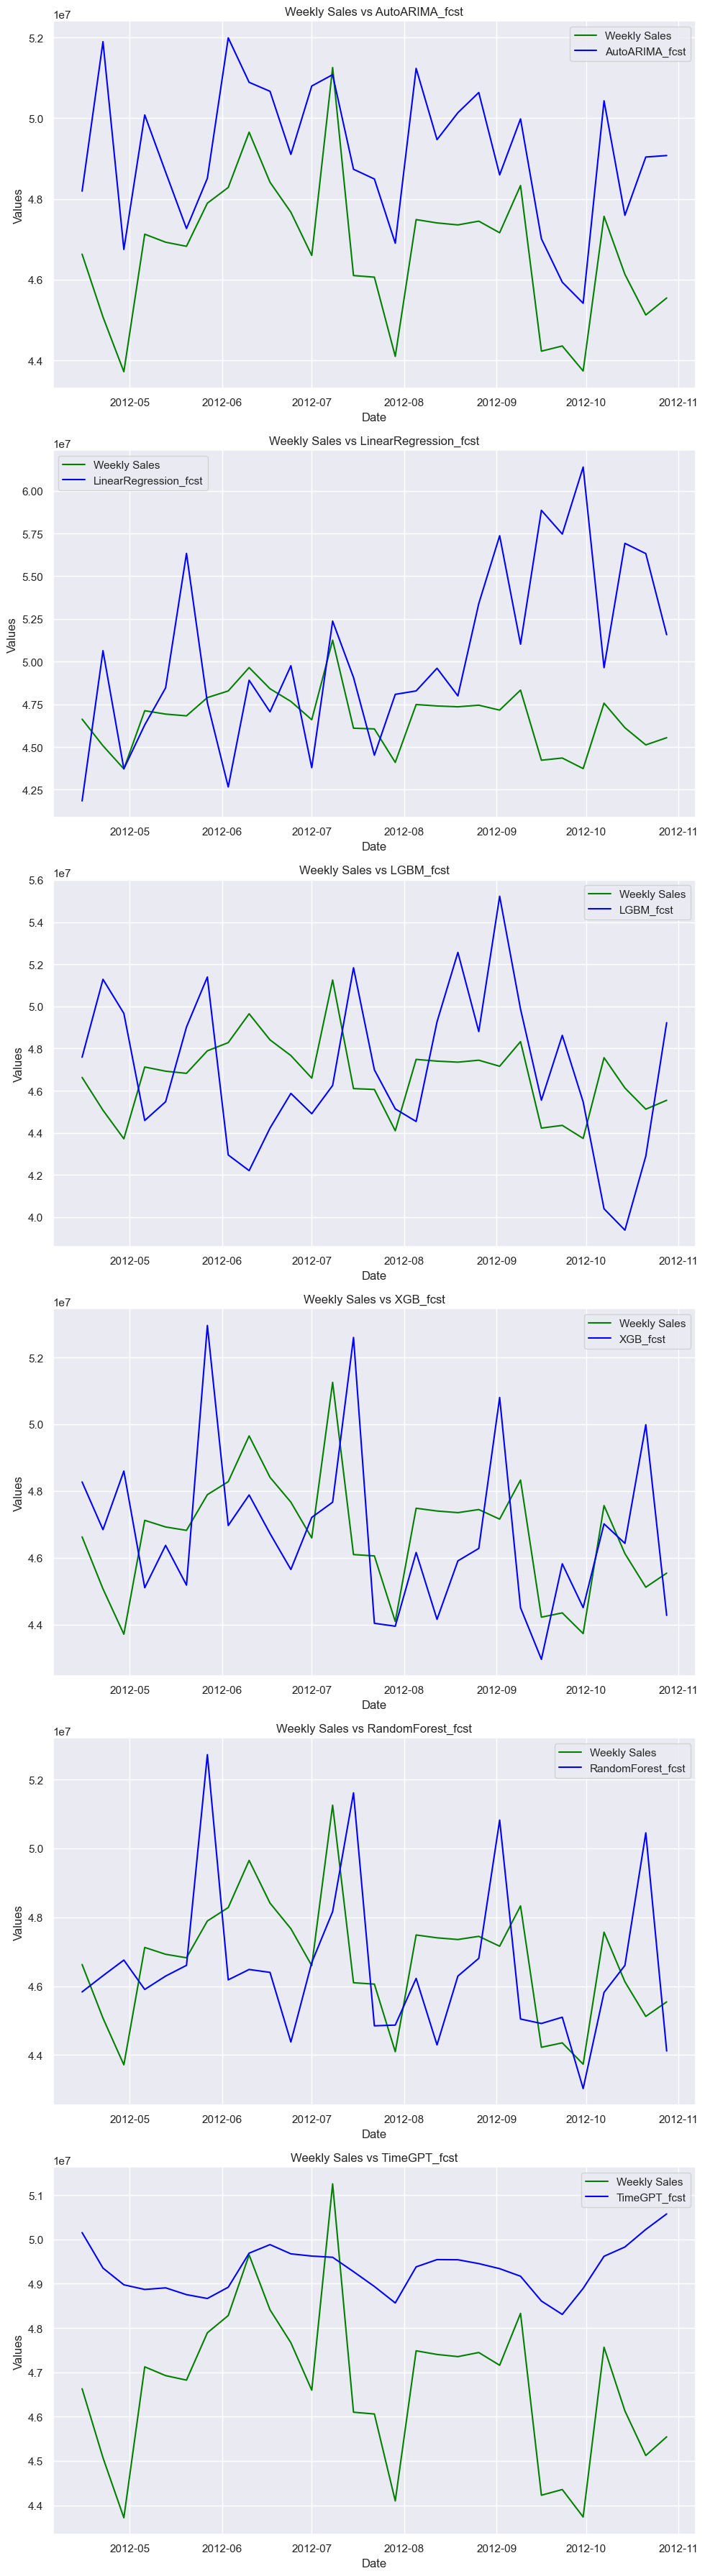

In [64]:
# Set seaborn style to darkgrid
sns.set(style="darkgrid")

# Create subplots for each prediction column
num_cols = len(result.columns[1:])
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, 6 * num_cols))

# Loop through each prediction column and plot on separate subplot
for i, col in enumerate(result.columns[1:]):  # Exclude 'Weekly_Sales'
    axes[i].plot(result.index, result['Weekly_Sales'], label='Weekly Sales', color='green')
    axes[i].plot(result.index, result[col], label=col, color='blue')
    axes[i].set_title(f'Weekly Sales vs {col}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Values')
    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

## Conclusion:

The article introduces TimeGPT, a foundational model for Time Series Forecasting, discusses about the need for the model, its architecture and training philosophy. Then it goes on to compare the forecasts of this model with traditional forecasting models.

Now, It can be seen that TimeGPT shows excellent performance when MAPE is the main accuracy metric (5.98). In other accuracy metric criterion also, it performs nearly equal to the other models and thus can easily be selected for forecasting data in many business use cases. 

Thus, TimeGPT presents itself as a very low code solution to the Time Series Problem. It is the first GPT based models to be trained on and used for time series data problems. Also, as experimentally proven in the article, this can perform quite well in many Supply Chain Business Cases, thus making forecasting process faster and accurate.

## Q & A:

## 1. How does TimeGPT compare to established statistical, machine learning, and deep learning methods in terms of performance, efficiency, and simplicity?

Ans: TimeGPT outperforms established statistical, machine learning, and deep learning methods in terms of performance, efficiency, and simplicity. The authors evaluated TimeGPT against a broad spectrum of baseline, statistical, machine learning, and neural forecasting models and found that TimeGPT's zero-shot inference excels in performance, efficiency, and simplicity.

## 2. What are the potential applications of large-scale time series models like TimeGPT in various industries and fields?

Ans: Large-scale time series models like TimeGPT have the potential to revolutionize various industries and fields due to their ability to generate accurate predictions for diverse datasets. Some potential applications include:



1. Finance: TimeGPT can be used for forecasting stock prices, currency exchange rates, and other financial indicators.



2. Web Traffic Analysis: It can help in predicting website traffic patterns and optimizing server allocation.

3. Internet of Things (IoT): TimeGPT can be applied to forecast sensor data, network traffic, and device performance.



4. Weather Forecasting: It has the potential to improve weather prediction models by analyzing historical data and making accurate forecasts.



5. Demand Forecasting: TimeGPT can assist in predicting demand for products and services, optimizing inventory management and supply chain operations.



6. Electricity Consumption: It can be utilized to forecast electricity consumption patterns, aiding in energy production and distribution planning.



These applications demonstrate the wide-ranging impact of large-scale time series models like TimeGPT across diverse domains, offering opportunities for improved decision-making and resource allocation.

## 3. How does TimeGPT handle missing data in time series forecasting, and what are the implications for its accuracy and performance?

Ans: TimeGPT handles missing data in time series forecasting by leveraging its underlying transformer-based architecture and the principles of training on a diverse set of time series data. 

The implications for its accuracy and performance are significant:



1. Imputation Mechanisms: TimeGPT is designed to handle missing data through its ability to learn complex patterns and relationships within time series. The model can implicitly capture and impute missing values based on the context of the available data, thereby reducing the impact of missing data on forecasting accuracy.



2. Robustness to Missing Data: By training on a diverse set of time series with varying characteristics, including noise, outliers, and missing values, TimeGPT is equipped to handle the challenges posed by missing data. This robustness contributes to the model's ability to maintain accuracy and performance even in the presence of incomplete time series data.



3. Forecasting Reliability: The model's adaptability to missing data enhances its reliability in generating accurate forecasts, as it can effectively incorporate available information to make predictions while accounting for the absence of certain data points.



4. Implications for Real-World Applications: In practical scenarios where missing data is common, such as sensor measurements or irregularly sampled time series, TimeGPT's capability to handle missing data can lead to more reliable and actionable forecasts, thereby improving decision-making processes.



Overall, TimeGPT's handling of missing data in time series forecasting contributes to its robustness, reliability, and potential for real-world applications, as it enables the model to produce accurate predictions even in the presence of incomplete data.

## 4. Can TimeGPT be used for anomaly detection in time series data, and how does it compare to other methods for this task?

Ans: TimeGPT can be used for anomaly detection in time series data, and it has shown promising results in this task. Here are some ways in which TimeGPT can be used for anomaly detection and how it compares to other methods:

1. Unsupervised Anomaly Detection: TimeGPT can be used for unsupervised anomaly detection by training the model on a large set of normal time series data and then using it to identify deviations from the learned patterns. This approach has shown to be effective in detecting anomalies in various domains, including finance, healthcare, and IoT.

2. Semi-Supervised Anomaly Detection: TimeGPT can also be used for semi-supervised anomaly detection by training the model on a combination of normal and anomalous time series data. This approach has shown to be effective in detecting rare and complex anomalies that may not be present in the normal data.

3. Comparison to Other Methods: TimeGPT has shown to outperform traditional statistical methods, such as ARIMA and exponential smoothing, in detecting anomalies in time series data. It has also shown to be competitive with other deep learning-based methods, such as LSTM and Autoencoder, while offering the advantage of being a pre-trained foundation model that can be fine-tuned for specific anomaly detection tasks.

4. Implications for Real-World Applications: Anomaly detection is a critical task in various domains, including cybersecurity, fraud detection, and predictive maintenance. TimeGPT's ability to detect anomalies in time series data with high accuracy and efficiency can lead to improved decision-making processes and reduced costs associated with false positives and negatives.

Overall, TimeGPT has shown to be a promising method for anomaly detection in time series data, offering advantages over traditional statistical methods and being competitive with other deep learning-based methods. Its potential for real-world applications in various domains makes it an exciting area of research for future developments.

## 5. How can TimeGPT be adapted to handle multivariate time series data, and what are the challenges associated with this task?

Ans: Adapting TimeGPT to handle multivariate time series data involves addressing several challenges while leveraging the model's strengths. Here are some considerations for adapting TimeGPT to multivariate time series data and the associated challenges:

1. Input Representation: Multivariate time series data consists of multiple variables or features evolving over time. Adapting TimeGPT to handle this data requires an appropriate input representation that captures the interdependencies and temporal dynamics among the variables. This may involve encoding the multivariate time series data in a format suitable for the model's transformer-based architecture.

2. Temporal Relationships: Capturing the temporal relationships between different variables in a multivariate time series is crucial for accurate forecasting and anomaly detection. TimeGPT needs to effectively learn and model the complex interactions and dependencies among the variables over time, which may require modifications to the model's attention mechanisms and input embeddings.

3. Dimensionality and Scale: Multivariate time series data often introduces higher dimensionality and scale compared to univariate data. Adapting TimeGPT to handle the increased dimensionality while maintaining computational efficiency is a significant challenge. Efficiently processing and learning from high-dimensional multivariate time series data without overwhelming the model's capacity is a key consideration.

4. Training and Fine-Tuning: Training TimeGPT on multivariate time series data involves considerations for model convergence, regularization, and fine-tuning to effectively capture the relationships between the variables. Balancing the learning of inter-variable dependencies with the model's ability to generalize across diverse multivariate time series is a non-trivial task.

5. Evaluation and Interpretability: Assessing the performance of TimeGPT on multivariate time series data and interpreting its predictions pose challenges related to model evaluation, uncertainty quantification, and explainability. Ensuring that the model's forecasts and anomaly detection capabilities align with the complex dynamics of multivariate time series data is essential.

Addressing these challenges while adapting TimeGPT to handle multivariate time series data holds the potential to enhance the model's applicability across a wide range of domains, including finance, healthcare, and industrial processes. By effectively capturing the interdependencies and temporal dynamics within multivariate time series, TimeGPT can offer valuable insights and accurate predictions for complex real-world scenarios.